# 📩 Spam SMS Classifier (NLP with Scikit-learn)

This project is a **Spam SMS Classifier** that uses **Natural Language Processing (NLP)** and **Machine Learning** to classify SMS messages as **Spam** or **Not Spam (Ham)**.

---

## 🚀 Features
- Preprocess SMS text:
  - Lowercasing
  - Stopword & punctuation removal
  - Tokenization
- Convert text into **TF-IDF vectors**.
- Train models like **Naive Bayes / Logistic Regression / SVM**.
- Evaluate with **Accuracy, Precision, Reca**


✅ Accuracy: 0.9

📊 Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.82      0.90        22
           1       0.82      1.00      0.90        18

    accuracy                           0.90        40
   macro avg       0.91      0.91      0.90        40
weighted avg       0.92      0.90      0.90        40



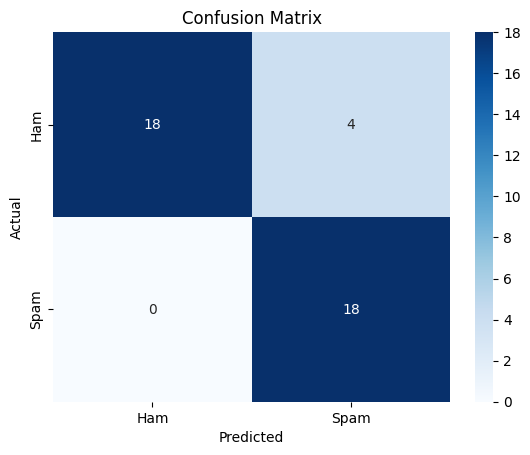

💾 Model and Vectorizer saved successfully!


In [1]:
# spam_classifier.py

import pandas as pd
import string
import joblib
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Load Dataset
data = pd.read_csv("spam.csv")  # must have v1=label, v2=message
data = data[["v1", "v2"]]
data.columns = ["label", "message"]

# Encode labels: ham=0, spam=1
data["label"] = data["label"].map({"ham": 0, "spam": 1})

# 2. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    data["message"], data["label"], test_size=0.2, random_state=42
)

# 3. TF-IDF Vectorizer (include $, emojis, words)
vectorizer = TfidfVectorizer(
    stop_words="english",
    lowercase=True,
    token_pattern=r"(?u)\b\w+\b|[$💰🎉👉🎂]"  # include $ and emojis
)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# 4. Train Model
model = LogisticRegression()
model.fit(X_train_vec, y_train)

# 5. Evaluate Model
y_pred = model.predict(X_test_vec)
print("✅ Accuracy:", accuracy_score(y_test, y_pred))
print("\n📊 Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(
    cm, annot=True, fmt="d", cmap="Blues",
    xticklabels=["Ham", "Spam"], yticklabels=["Ham", "Spam"]
)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# 6. Save Model & Vectorizer
joblib.dump(model, "spam_model.pkl")
joblib.dump(vectorizer, "vectorizer.pkl")

print("💾 Model and Vectorizer saved successfully!")


In [ ]:
import joblib

# Load the trained model and vectorizer
model = joblib.load("spam_model.pkl")
vectorizer = joblib.load("vectorizer.pkl")

print("📩 Spam SMS Classifier")
print("Type 'quit' to exit.\n")

while True:
    user_input = input("Enter a message: ")
    
    if user_input.lower() in ["quit", "exit"]:
        print("👋 Exiting... Goodbye!")
        break
    
    # Transform input and predict
    transformed_input = vectorizer.transform([user_input])
    prediction = model.predict(transformed_input)[0]
    
    if prediction == 1:
        print("🚨SPAM Message\n")
    else:
        print("✅NOT SPAM Message\n")
